In [ ]:
import pandas as pd

df = pd.read_csv('titanic.csv');
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='count'>

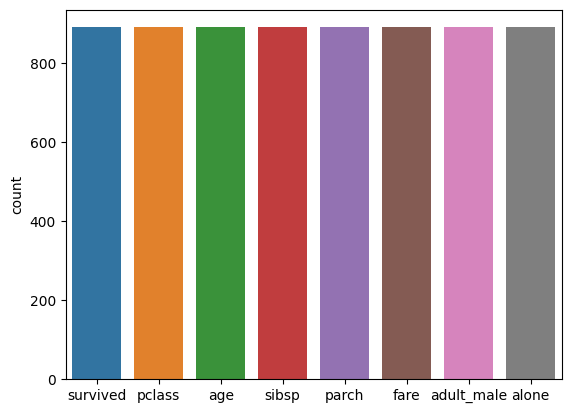

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df)

<Axes: xlabel='sex', ylabel='count'>

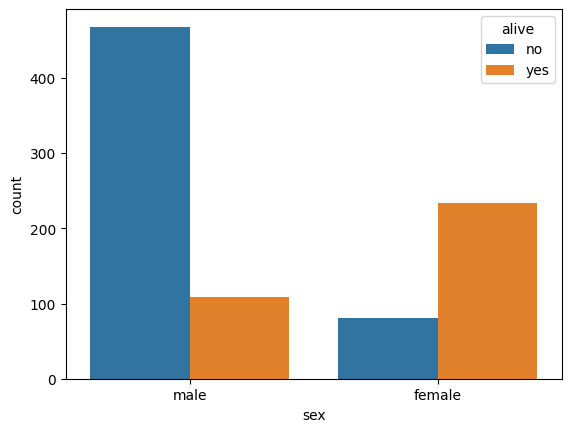

In [ ]:
  sns.countplot(x='sex', hue='alive', data=df)


<Axes: xlabel='age', ylabel='alive'>

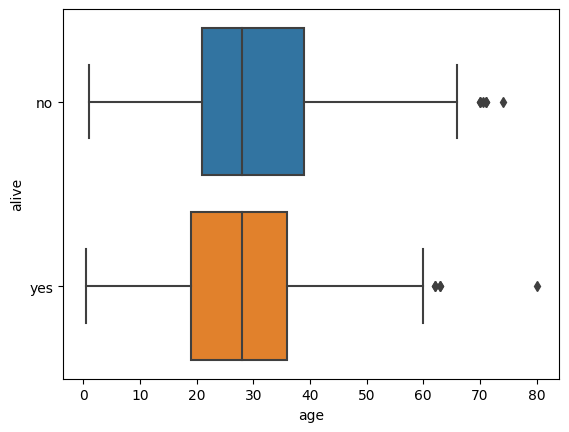

In [ ]:
sns.boxplot(x='age', y='alive', data=df)


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(df.isnull().sum())
df.drop('deck',axis =1 , inplace = True)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
df_mean_imputed = df.fillna(df.mean() , inplace = True)


<ipython-input-27-695b8a12bd9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_imputed = df.fillna(df.mean() , inplace = True)


In [ ]:
import pandas as pd

df = pd.read_csv('titanic.csv')

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
outliers = (df['age'] < Q1 - threshold) | (df['age'] > Q3 + threshold)
df.loc[outliers, 'age'] = df['age'].median()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#Encoding
df_encoded = pd.get_dummies(df)
df_encoded

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
888,0,3,NaN,1,2,23.4500,False,False,1,0,...,0,0,0,0,0,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,True,True,0,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Perform Min-Max scaling on 'Fare' column
scaler = MinMaxScaler()
df['fare'] = scaler.fit_transform(df[['fare']])

print(df['fare'])

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: fare, Length: 891, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

target = df_encoded['alive_yes']
df_encoded.drop(['alive_yes'] ,inplace=True , axis =1)
x_train , x_test , y_train ,y_test = train_test_split(df , target)